<a href="https://colab.research.google.com/github/HABONIMANA/EXERCICE/blob/main/Exemple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr

In [ ]:
# Données de l'enquête
data = pd.read_csv("https://raw.githubusercontent.com/HABONIMANA/EXERCICE/refs/heads/main/rola_cola_IFI%20-%20rola_cola.csv")

# Séléction les 5 premières lignes qu'on va utliser
data_5_colonnes = data.iloc[:, :5]

# test pour voir ça
print(data_5_colonnes)


    q1  q2  q3  q4  q5
0    2   2   1   4   2
1    1   1   2   8  11
2    2   2   3   2   1
3    1   1   2  10  11
4    1   2   1   7   5
5    1   1   3   6   7
6    2   2   1   4   4
7    1   2   1   3   1
8    2   2   2   3   2
9    1   2   1   5   7
10   1   1   2   7   6
11   1   1   3  13  17
12   1   1   1   6   6
13   2   2   1   2   2
14   2   2   3   7   7
15   1   1   2   9  11
16   2   2   3   1   0
17   1   1   1   5   5
18   1   2   2   4   3
19   1   2   2  12  13
20   2   2   1   4   3
21   1   1   3   9   7
22   1   1   3   3   4
23   2   2   3   2   3
24   2   2   2   5   3
25   1   1   1   7   9
26   2   2   1   7   4
27   1   1   2   8   7
28   1   1   3   6   4
29   2   2   3   3   4
30   2   1   2  10   6
31   1   1   1   8   7
32   2   1   2   4   4
33   1   2   2   5   5
34   1   1   3   3   1
35   2   2   1  11   9
36   1   1   3   9  11
37   1   2   1   6   8
38   2   2   3   2   0
39   1   1   2   5   7


In [ ]:
# Rénomation des colonnes q1, q2, q3, q4, q5 pour correspondre aux questions
data_5_colonnes.columns= ['q1', 'q2', 'q3', 'q4', 'q5']

data_5_colonnes= data_5_colonnes.dropna()



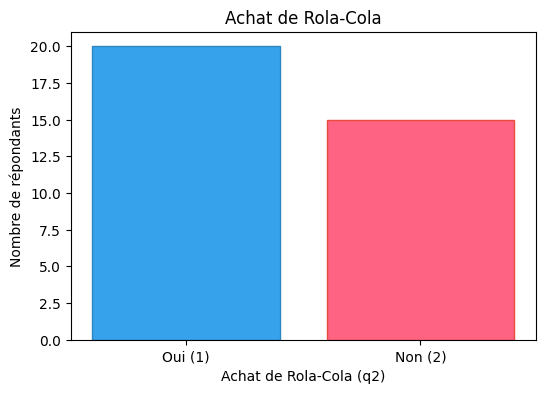

In [ ]:
# Données pour q2
labels = ['Oui (1)', 'Non (2)']
frequences = [20, 15]

# Diagramme en barres
plt.figure(figsize=(6, 4))
plt.bar(labels, frequences, color=['#36A2EB', '#FF6384'], edgecolor=['#2E86C1', '#E74C3C'])
plt.title('Achat de Rola-Cola')
plt.xlabel('Achat de Rola-Cola (q2)')
plt.ylabel('Nombre de répondants')
plt.show()

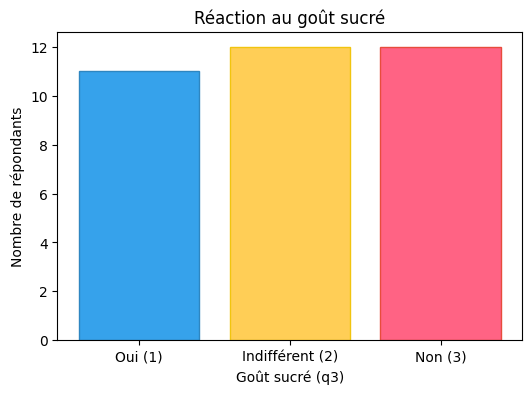

In [ ]:
# Données pour q3
labels = ['Oui (1)', 'Indifférent (2)', 'Non (3)']
frequences = [11, 12, 12]

# Diagramme en barres
plt.figure(figsize=(6, 4))
plt.bar(labels, frequences, color=['#36A2EB', '#FFCE56', '#FF6384'], edgecolor=['#2E86C1', '#F1C40F', '#E74C3C'])
plt.title('Réaction au goût sucré')
plt.xlabel('Goût sucré (q3)')
plt.ylabel('Nombre de répondants')
plt.show()

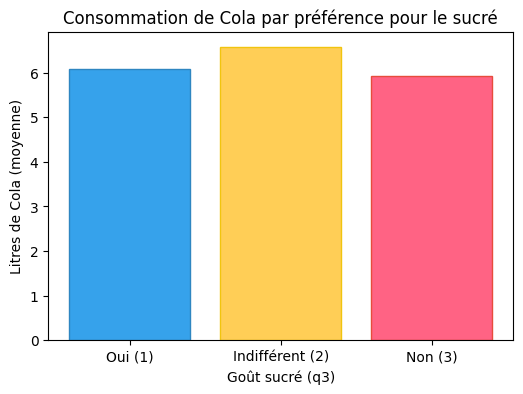

In [ ]:
# Données pour q3-q4
labels = ['Oui (1)', 'Indifférent (2)', 'Non (3)']
moyennes = [6.09, 6.58, 5.92]

# Diagramme en barres
plt.figure(figsize=(6, 4))
plt.bar(labels, moyennes, color=['#36A2EB', '#FFCE56', '#FF6384'], edgecolor=['#2E86C1', '#F1C40F', '#E74C3C'])
plt.title('Consommation de Cola par préférence pour le sucré')
plt.xlabel('Goût sucré (q3)')
plt.ylabel('Litres de Cola (moyenne)')
plt.show()

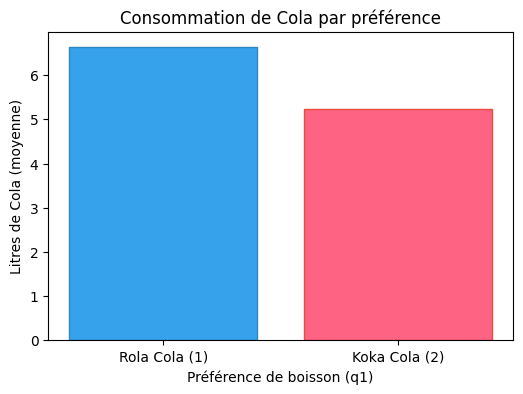

In [ ]:
# Données pour q4-q1
labels = ['Rola Cola (1)', 'Koka Cola (2)']
moyennes = [6.64, 5.23]

# Diagramme en barres
plt.figure(figsize=(6, 4))
plt.bar(labels, moyennes, color=['#36A2EB', '#FF6384'], edgecolor=['#2E86C1', '#E74C3C'])
plt.title('Consommation de Cola par préférence')
plt.xlabel('Préférence de boisson (q1)')
plt.ylabel('Litres de Cola (moyenne)')
plt.show()

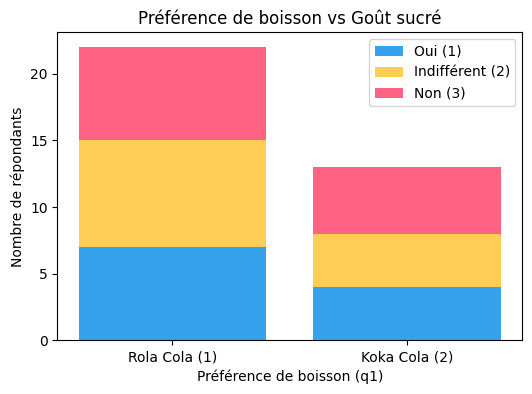

In [ ]:
# Données pour q1-q3
labels = ['Rola Cola (1)', 'Koka Cola (2)']
oui = [7, 4]
indifferent = [8, 4]
non = [7, 5]

# Barres empilées
plt.figure(figsize=(6, 4))
x = np.arange(len(labels))
plt.bar(x, oui, color='#36A2EB', label='Oui (1)')
plt.bar(x, indifferent, bottom=oui, color='#FFCE56', label='Indifférent (2)')
plt.bar(x, non, bottom=np.array(oui) + np.array(indifferent), color='#FF6384', label='Non (3)')
plt.xticks(x, labels)
plt.title('Préférence de boisson vs Goût sucré')
plt.xlabel('Préférence de boisson (q1)')
plt.ylabel('Nombre de répondants')
plt.legend()
plt.show()

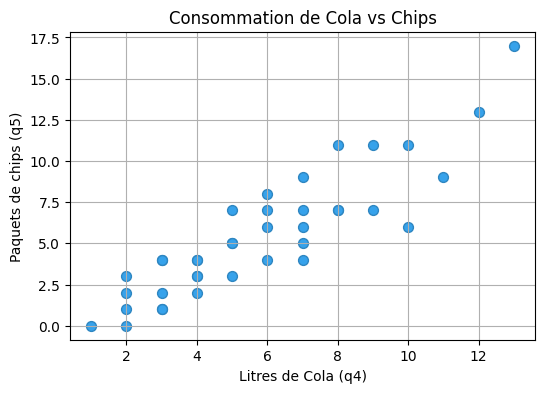

In [ ]:
# Données pour q4 et q5
q4 = [4, 8, 2, 10, 7, 6, 4, 3, 3, 5, 7, 13, 6, 2, 7, 9, 1, 5, 4, 12, 4, 9, 3, 2, 5, 7, 7, 8, 6, 3, 10, 8, 4, 5, 3, 11, 6, 2]
q5 = [2, 11, 1, 11, 5, 7, 4, 1, 2, 7, 6, 17, 6, 2, 7, 11, 0, 5, 3, 13, 3, 7, 4, 3, 3, 9, 4, 7, 4, 4, 6, 7, 4, 5, 1, 9, 8, 0]

# Nuage de points
plt.figure(figsize=(6, 4))
plt.scatter(q4, q5, color='#36A2EB', edgecolor='#2E86C1', s=50)
plt.title('Consommation de Cola vs Chips')
plt.xlabel('Litres de Cola (q4)')
plt.ylabel('Paquets de chips (q5)')
plt.grid(True)
plt.show()

Statistiques de la consommation de Cola (q4) par boisson préférée (q1) :
           count      mean       std  min  25%  50%   75%   max
q1_label                                                       
Koka Cola   16.0  4.437500  2.920474  1.0  2.0  4.0  5.50  11.0
Rola Cola   24.0  6.833333  2.648489  3.0  5.0  6.5  8.25  13.0


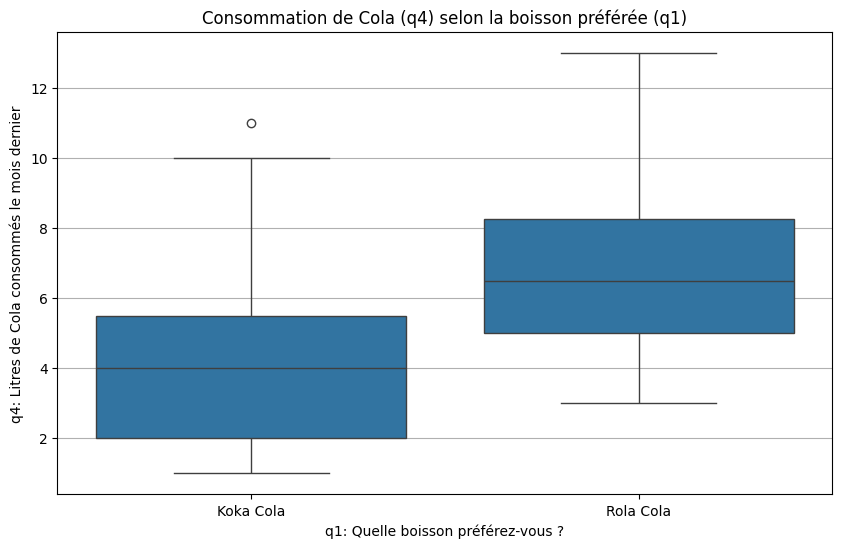

In [ ]:
# Calcul des statistiques descriptives de q4 groupées par q1
stats_q4_by_q1 = df.groupby('q1_label')['q4'].describe()
print("Statistiques de la consommation de Cola (q4) par boisson préférée (q1) :")
print(stats_q4_by_q1)


# Création d'un box plot pour visualiser la distribution
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='q1_label', y='q4')
plt.title('Consommation de Cola (q4) selon la boisson préférée (q1)')
plt.xlabel('q1: Quelle boisson préférez-vous ?')
plt.ylabel('q4: Litres de Cola consommés le mois dernier')
plt.grid(axis='y')
plt.show()

Statistiques de la consommation de Cola (q4) par préférence pour le sucre (q3) :
                  count      mean       std  min  25%  50%  75%   max
q3_label                                                             
Indifférent        13.0  6.923077  2.812518  3.0  5.0  7.0  9.0  12.0
Non (n'aime pas)   13.0  5.076923  3.616203  1.0  2.0  3.0  7.0  13.0
Oui (aime sucré)   14.0  5.642857  2.307418  2.0  4.0  5.5  7.0  11.0


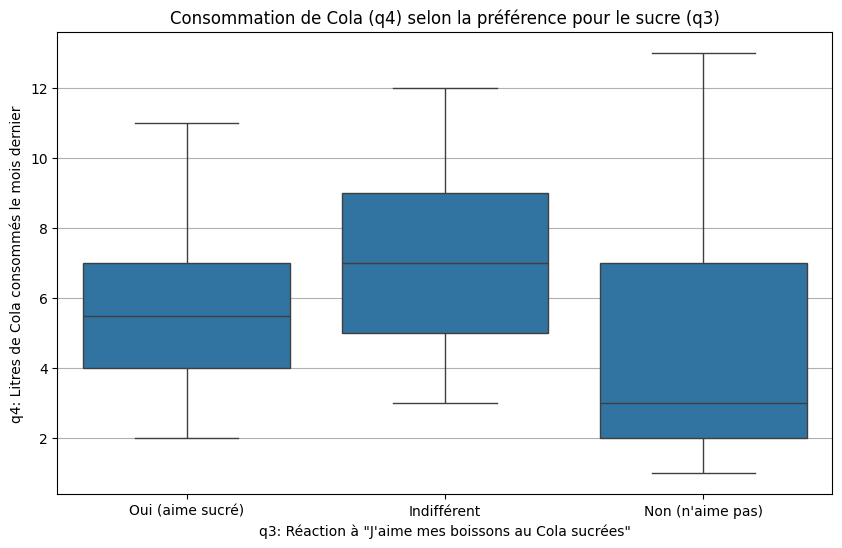

In [ ]:
# Calcul des statistiques descriptives de q4 groupées par q3
stats_q4_by_q3 = df.groupby('q3_label')['q4'].describe()
print("Statistiques de la consommation de Cola (q4) par préférence pour le sucre (q3) :")
print(stats_q4_by_q3)


# Création d'un box plot pour visualiser la distribution
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='q3_label', y='q4')
plt.title('Consommation de Cola (q4) selon la préférence pour le sucre (q3)')
plt.xlabel('q3: Réaction à "J\'aime mes boissons au Cola sucrées"')
plt.ylabel('q4: Litres de Cola consommés le mois dernier')
plt.grid(axis='y')
plt.show()

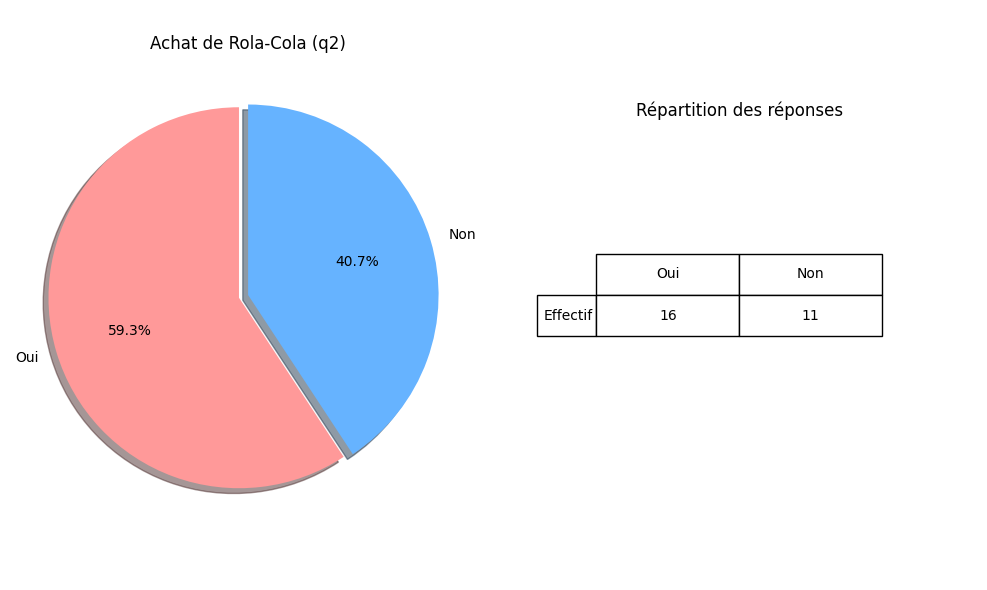

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Données brutes (à remplacer par vos données exactes)
q2_data = [1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1]

# Création du DataFrame
df = pd.DataFrame({'q2': q2_data})

# Remplacement des codes
df['q2'] = df['q2'].map({1: 'Oui', 2: 'Non'})

# Calcul des fréquences
freq = df['q2'].value_counts()

# Création du diagramme
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)  # 1 ligne, 2 colonnes - position 1

# Diagramme en cercle
patches, texts, autotexts = plt.pie(freq,
                                   labels=freq.index,
                                   autopct='%1.1f%%',
                                   colors=['#ff9999', '#66b3ff'],
                                   startangle=90,
                                   explode=(0.05, 0),
                                   shadow=True)

plt.title('Achat de Rola-Cola (q2)')

# Tableau de fréquences (subplot 2)
plt.subplot(1, 2, 2)
plt.axis('off')
table = plt.table(cellText=[freq.values],
                 rowLabels=['Effectif'],
                 colLabels=freq.index,
                 loc='center',
                 cellLoc='center',
                 colWidths=[0.3, 0.3])

table.scale(1, 2)
plt.title('Répartition des réponses', y=0.8)

plt.tight_layout()
plt.show()